In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import csv

import algos
import viz

from cluster import Cluster as Cluster

Loaded 3108 data points
Displaying 15 sequential clusters


In [2]:
def gen_random_clusters(num_clusters):
    clusters = []
    for i in range(num_clusters):
        x = 2 * random.random() - 1
        y = 2 * random.random() - 1
        clusters.append(Cluster(set(['0']), x, y, 1, 1))
        
    return clusters

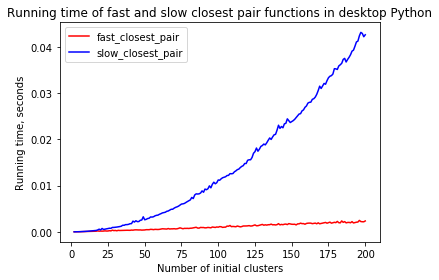

In [4]:
xs = range(2, 201)
ys_fast, ys_slow = [], []
for n in xs:
    clusters = gen_random_clusters(n)
    ys_fast.append(timeit.timeit(lambda: algos.fast_closest_pair(clusters), number=1))
    ys_slow.append(timeit.timeit(lambda: algos.slow_closest_pair(clusters), number=1))

plt.plot(xs, ys_fast, '-r', label='fast_closest_pair')
plt.plot(xs, ys_slow, '-b', label='slow_closest_pair')
plt.title('Running time of fast vs slow closest pair in desktop Python')
plt.xlabel('Number of initial clusters')
plt.ylabel('Running time, seconds')
plt.legend(loc='upper right')
plt.tight_layout()